In [18]:
# Load the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the dataset

df = pd.read_csv('data/raw/pharma_spending_data.csv')

In [19]:
# Step 1: Data Cleaning
# Drop rows where LOCATION or TIME are missing, as they are essential
df.dropna(subset=['LOCATION', 'TIME'], inplace=True)

# Fill missing values in other columns with appropriate strategies
# For PC_HEALTHXP, PC_GDP, USD_CAP, and TOTAL_SPEND, we use mean imputation as an example
df.dropna(subset=['LOCATION', 'TIME'], inplace=True)
df['PC_HEALTHXP'].fillna(df['PC_HEALTHXP'].mean(), inplace=True)
df['PC_GDP'].fillna(df['PC_GDP'].mean(), inplace=True)
df['USD_CAP'].fillna(df['USD_CAP'].mean(), inplace=True)
df['TOTAL_SPEND'].fillna(df['TOTAL_SPEND'].mean(), inplace=True)
df['FLAG_CODES'].fillna('Unknown', inplace=True)

# Fill FLAG_CODES missing values with 'Unknown' to denote unreliability in these cases
df['FLAG_CODES'].fillna('Unknown', inplace=True)

# Step 2: Categorization based on TOTAL_SPEND
# Calculate the spend thresholds for categorization
top_threshold = df['TOTAL_SPEND'].quantile(0.75)
bottom_threshold = df['TOTAL_SPEND'].quantile(0.25)

# Define categories for top, mid, and bottom spenders
def categorize_spender(spend):
    if spend >= top_threshold:
        return 'Top'
    elif spend <= bottom_threshold:
        return 'Bottom'
    else:
        return 'Mid'

# Apply categorization
df['Spender_Category'] = df['TOTAL_SPEND'].apply(categorize_spender)

# Step 3: Analysis of Categories
# Calculate basic statistics for each category
category_summary = df.groupby('Spender_Category')[['TOTAL_SPEND', 'PC_HEALTHXP', 'PC_GDP', 'USD_CAP']].mean()

# Display the count of countries in each category
category_counts = df['Spender_Category'].value_counts()

# Display results
print("Category Summary Statistics:\n", category_summary)
print("\nCategory Counts:\n", category_counts)

# Optional: Save cleaned and categorized data to a new file
df.to_csv('cleaned_and_categorized_pharma_spending.csv', index=False)

Category Summary Statistics:
                    TOTAL_SPEND  PC_HEALTHXP    PC_GDP     USD_CAP
Spender_Category                                                 
Bottom              323.133436    13.863656  0.813413  159.119089
Mid                2917.068340    16.366351  1.170923  288.288890
Top               40904.422355    19.028869  1.528533  444.491089

Category Counts:
 Spender_Category
Mid       518
Bottom    259
Top       259
Name: count, dtype: int64


C:\Users\khali\AppData\Local\Temp\ipykernel_19752\3507095884.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PC_HEALTHXP'].fillna(df['PC_HEALTHXP'].mean(), inplace=True)
C:\Users\khali\AppData\Local\Temp\ipykernel_19752\3507095884.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [20]:
# Step 2: Aggregate TOTAL_SPEND by country
country_spend = df.groupby('LOCATION')['TOTAL_SPEND'].sum().reset_index()

# Step 3: Sort by TOTAL_SPEND in descending order
country_spend_sorted = country_spend.sort_values(by='TOTAL_SPEND', ascending=False)

# Step 4: Categorize into Top 10, Middle 10, and Bottom 10 based on TOTAL_SPEND
top_10_countries = country_spend_sorted.head(10)
bottom_10_countries = country_spend_sorted.tail(10)
middle_10_start = len(country_spend_sorted) // 2 - 5  # Determine the middle segment start
middle_10_countries = country_spend_sorted.iloc[middle_10_start:middle_10_start + 10]

# Add a new column to label each category
country_spend_sorted['Spender_Category'] = 'Other'
country_spend_sorted.loc[top_10_countries.index, 'Spender_Category'] = 'Top 10 Spenders'
country_spend_sorted.loc[middle_10_countries.index, 'Spender_Category'] = 'Middle 10 Spenders'
country_spend_sorted.loc[bottom_10_countries.index, 'Spender_Category'] = 'Bottom 10 Spenders'

# Optional: Save the categorized dataset
country_spend_sorted.to_csv('categorized_pharma_spending_by_country.csv', index=False)

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the categorized dataset if already saved, or use the sorted DataFrame from the previous steps
# country_spend_sorted = pd.read_csv('categorized_pharma_spending_by_country.csv')

# Extract each category
top_10_countries = country_spend_sorted[country_spend_sorted['Spender_Category'] == 'Top 10 Spenders']
middle_10_countries = country_spend_sorted[country_spend_sorted['Spender_Category'] == 'Middle 10 Spenders']
bottom_10_countries = country_spend_sorted[country_spend_sorted['Spender_Category'] == 'Bottom 10 Spenders']

# Function to plot a category
def plot_category(data, title):
    plt.figure(figsize=(10, 6))
    plt.bar(data['LOCATION'], data['TOTAL_SPEND'], color='skyblue')
    plt.title(f'{title} by TOTAL_SPEND')
    plt.xlabel('Country')
    plt.ylabel('Total Spend (Millions USD)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [22]:
# Step 5: Display or Save the Results
# Display each category with country names and total spend
print("Top 10 Countries by TOTAL_SPEND:\n", top_10_countries[['LOCATION', 'TOTAL_SPEND']])

Top 10 Countries by TOTAL_SPEND:
    LOCATION  TOTAL_SPEND
35      USA   4186292.78
19      JPN   1602492.93
6       DEU   1188168.49
11      FRA    802298.94
18      ITA    754377.19
24      MEX    451903.24
3       CAN    445157.79
8       ESP    436073.35
20      KOR    413876.98
12      GBR    243390.12


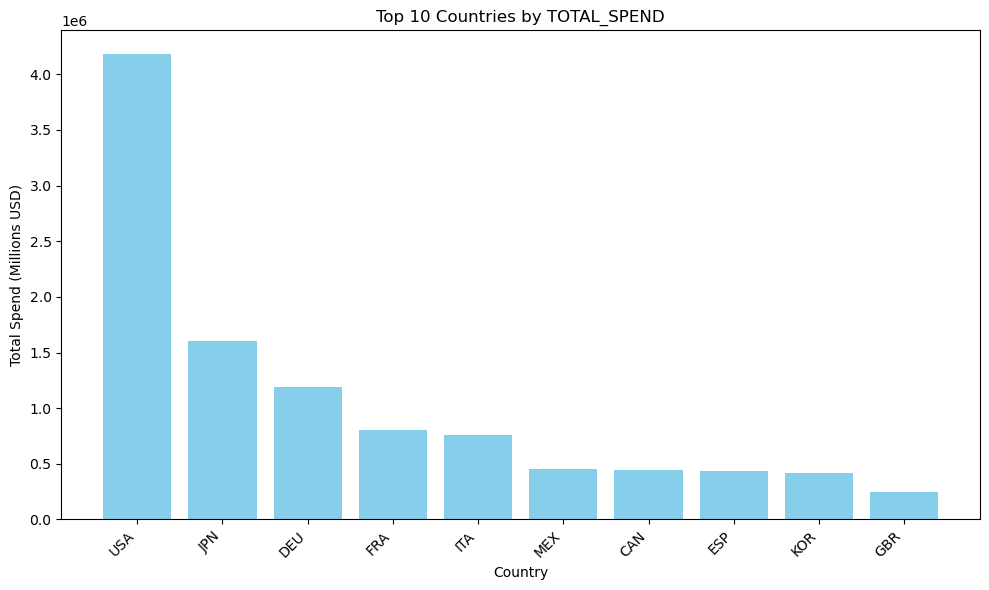

In [23]:
# Plot each category
plot_category(top_10_countries, "Top 10 Countries")

In [24]:
# Display each category with country names and total spend
print("\nMiddle 10 Countries by TOTAL_SPEND:\n", middle_10_countries[['LOCATION', 'TOTAL_SPEND']])


Middle 10 Countries by TOTAL_SPEND:
    LOCATION  TOTAL_SPEND
2       BEL    126330.37
13      GRC    113206.42
29      PRT    106881.27
4       CHE    103005.12
33      SWE     93430.58
1       AUT     82723.22
14      HUN     81580.59
5       CZE     78489.23
10      FIN     52228.15
15      IRL     46876.19


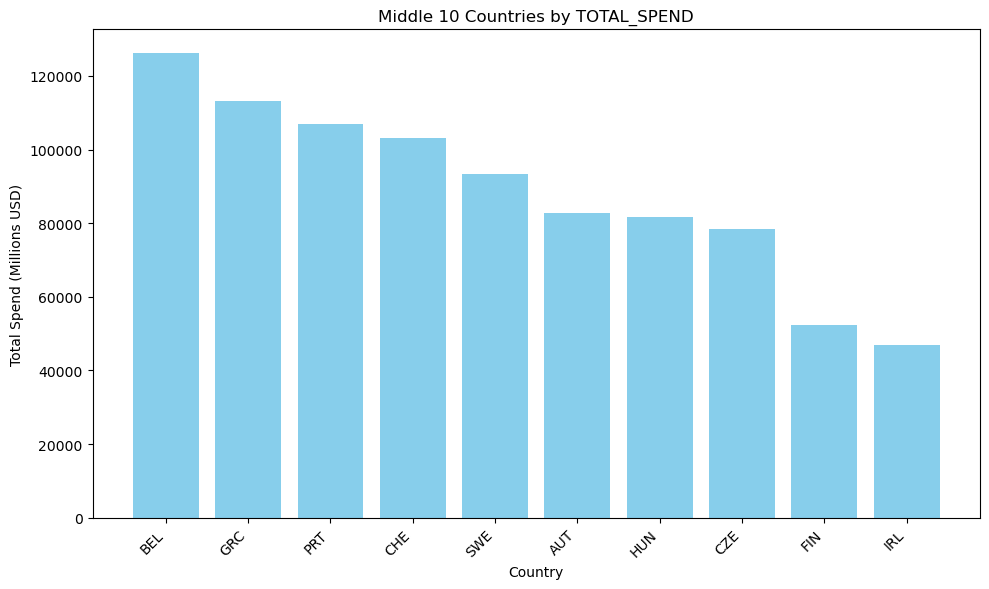

In [25]:
# Plot each category
plot_category(middle_10_countries, "Middle 10 Countries")

In [26]:
# Display each category with country names and total spend
print("\nBottom 10 Countries by TOTAL_SPEND:\n", bottom_10_countries[['LOCATION', 'TOTAL_SPEND']])


Bottom 10 Countries by TOTAL_SPEND:
    LOCATION  TOTAL_SPEND
31      SVK     38472.30
34      TUR     25138.33
17      ISR     16654.40
21      LTU     13859.94
32      SVN     12694.20
27      NZL     11907.15
23      LVA      6829.89
9       EST      5179.24
22      LUX      4858.94
16      ISL      3752.89


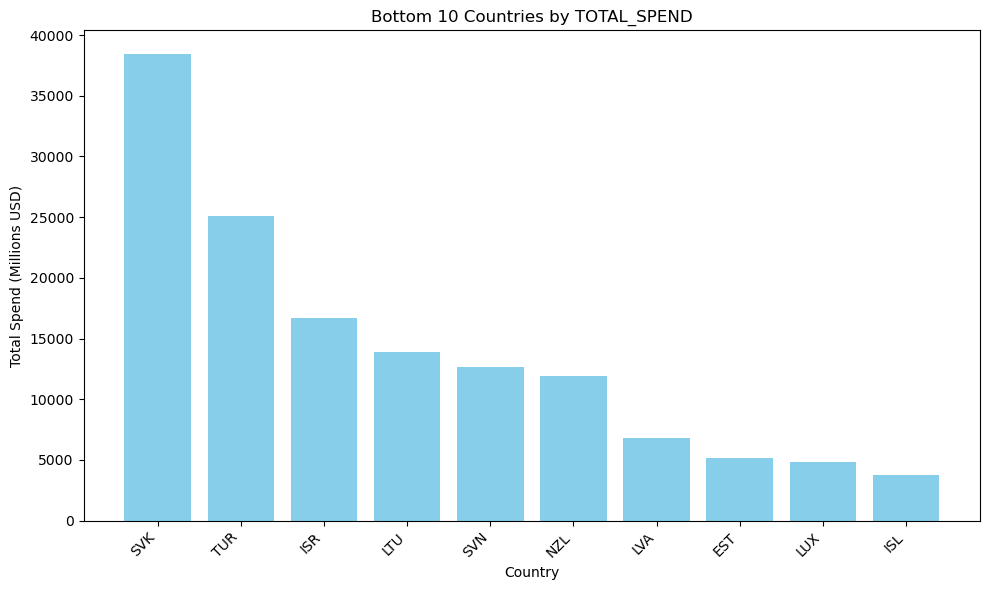

In [27]:
# Plot each category
plot_category(bottom_10_countries, "Bottom 10 Countries")

In this case, where you’re analyzing and comparing spending among countries, purposive sampling or judgmental sampling has been used. Here’s why and how it applies:

Purposive Sampling:

Definition: This method involves selecting specific subgroups of interest based on certain criteria rather than random selection.
Application: You are selecting the top 10, middle 10, and bottom 10 countries by TOTAL_SPEND, which is a targeted, non-random sample designed to provide insights into high, moderate, and low spenders. This enables focused comparisons and analysis within defined spending brackets.
Alternative Sampling Approaches (if required for more general analysis):

Stratified Sampling: You could stratify the dataset into spending levels (e.g., high, medium, low based on quantiles or other ranges) and then select random samples within each stratum. This would give a more randomized but still representative view within each spending level.
Systematic Sampling: This could be applied if you wanted a representative sample spread out across the entire dataset by choosing every nth country after sorting by TOTAL_SPEND, providing an evenly spaced sample of countries across spending levels.
In your case, purposive sampling is most effective since you are interested in directly analyzing and comparing specific groups based on spending levels.

Record a 3-5 minute video (at the end of Part 2) reflecting on your experience. Answer the following questions:

What did you learn?

What challenges did you face?

How did you overcome those challenges?

If you had more time, what would you add?

What strengths do you bring to a team environment?

In [28]:
# Find the number of unique countries
num_countries = df['LOCATION'].nunique()

# Find the number of unique years
num_years = df['TIME'].nunique()

# Determine the year range of the dataset
year_range = (df['TIME'].min(), df['TIME'].max())

# Find the total number of observations
total_observations = len(df)

# Find the total number of possible observations
potential_observations = num_countries * num_years

# Find the number of missing values
num_missing = potential_observations - total_observations

# Display the results
print("Number of Countries:", num_countries)
print("Number of Years:", num_years)
print("Year Range:", year_range)
print("Total Observations:", total_observations)
print("Total Number of Possible Observations:", potential_observations)
print("Number of Missing Values:", num_missing)

Number of Countries: 36
Number of Years: 47
Year Range: (1970, 2016)
Total Observations: 1036
Total Number of Possible Observations: 1692
Number of Missing Values: 656


C:\Users\khali\AppData\Local\Temp\ipykernel_19752\2294791767.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table = pivot_table.applymap(lambda x: 1 if x > 0 else 0)


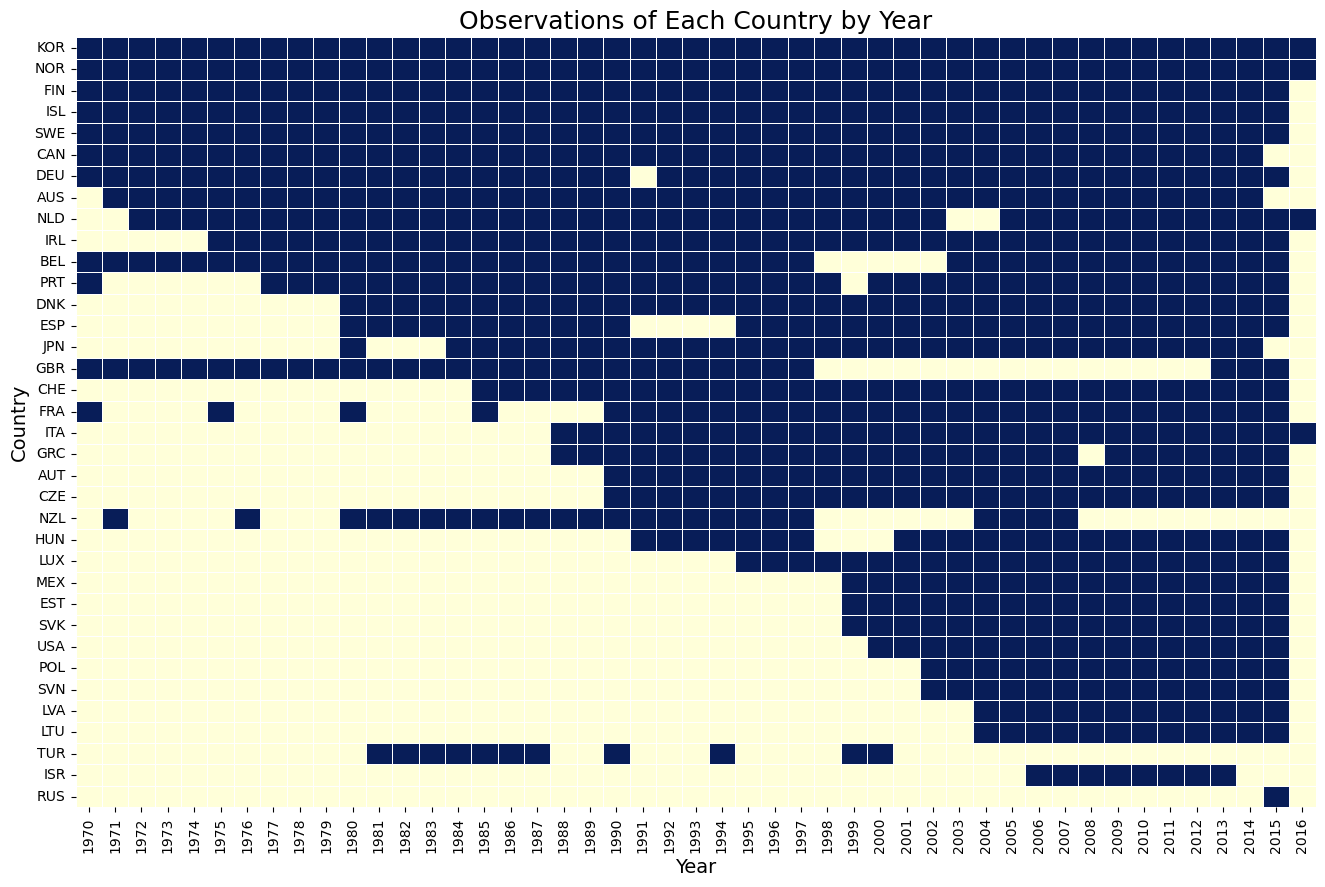

In [29]:
# Create a pivot table with countries as rows and years as columns
pivot_table = df.pivot_table(index='LOCATION', columns='TIME', aggfunc='size', fill_value=0)

# Convert the pivot table to a binary format (presence or absence of observation)
pivot_table = pivot_table.applymap(lambda x: 1 if x > 0 else 0)

# Count the number of observations per country
observation_counts = pivot_table.sum(axis=1)

# Sort the countries by the number of observations
sorted_countries = observation_counts.sort_values(ascending=False).index

# Reorder the pivot table based on the sorted countries
pivot_table_sorted = pivot_table.loc[sorted_countries]

# Plot the heatmap
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(pivot_table_sorted, cmap="YlGnBu", cbar=False, linewidths=.5)

# Add labels and title
heatmap.set_xlabel('Year', fontsize=14)
heatmap.set_ylabel('Country', fontsize=14)
heatmap.set_title('Observations of Each Country by Year', fontsize=18)

# Display the heatmap
plt.show()

In [30]:
# Step 2: Calculate the number of observations per country
country_observations = df.groupby('LOCATION').size().reset_index(name='num_observations')

# Step 3: Categorize countries into groups based on the number of observations
def categorize_observations(num):
    if num >= 45:
        return "More than 45 Observations"
    elif 20 <= num < 45:
        return "Between 20 and 45 Observations"
    else:
        return "Less than 20 Observations"

country_observations['Category'] = country_observations['num_observations'].apply(categorize_observations)

# Step 4: Split the categorized data into separate tables
more_than_45 = country_observations[country_observations['Category'] == "More than 45 Observations"]
between_20_and_45 = country_observations[country_observations['Category'] == "Between 20 and 45 Observations"]
less_than_20 = country_observations[country_observations['Category'] == "Less than 20 Observations"]

# Step 5: Display each category as a separate table with the count of countries
print("\nTable: Countries with More than 45 Observations")
print(f"Number of Countries: {len(more_than_45)}")
print(more_than_45)

print("\nTable: Countries with Between 20 and 45 Observations")
print(f"Number of Countries: {len(between_20_and_45)}")
print(between_20_and_45)

print("\nTable: Countries with Less than 20 Observations")
print(f"Number of Countries: {len(less_than_20)}")
print(less_than_20)

# Optional: Save each table as separate CSV files
more_than_45.to_csv('more_than_45_observations.csv', index=False)
between_20_and_45.to_csv('between_20_and_45_observations.csv', index=False)
less_than_20.to_csv('less_than_20_observations.csv', index=False)


Table: Countries with More than 45 Observations
Number of Countries: 7
   LOCATION  num_observations                   Category
3       CAN                45  More than 45 Observations
6       DEU                45  More than 45 Observations
10      FIN                46  More than 45 Observations
16      ISL                46  More than 45 Observations
20      KOR                47  More than 45 Observations
26      NOR                47  More than 45 Observations
33      SWE                46  More than 45 Observations

Table: Countries with Between 20 and 45 Observations
Number of Countries: 18
   LOCATION  num_observations                        Category
0       AUS                44  Between 20 and 45 Observations
1       AUT                26  Between 20 and 45 Observations
2       BEL                41  Between 20 and 45 Observations
4       CHE                31  Between 20 and 45 Observations
5       CZE                26  Between 20 and 45 Observations
7       DNK           

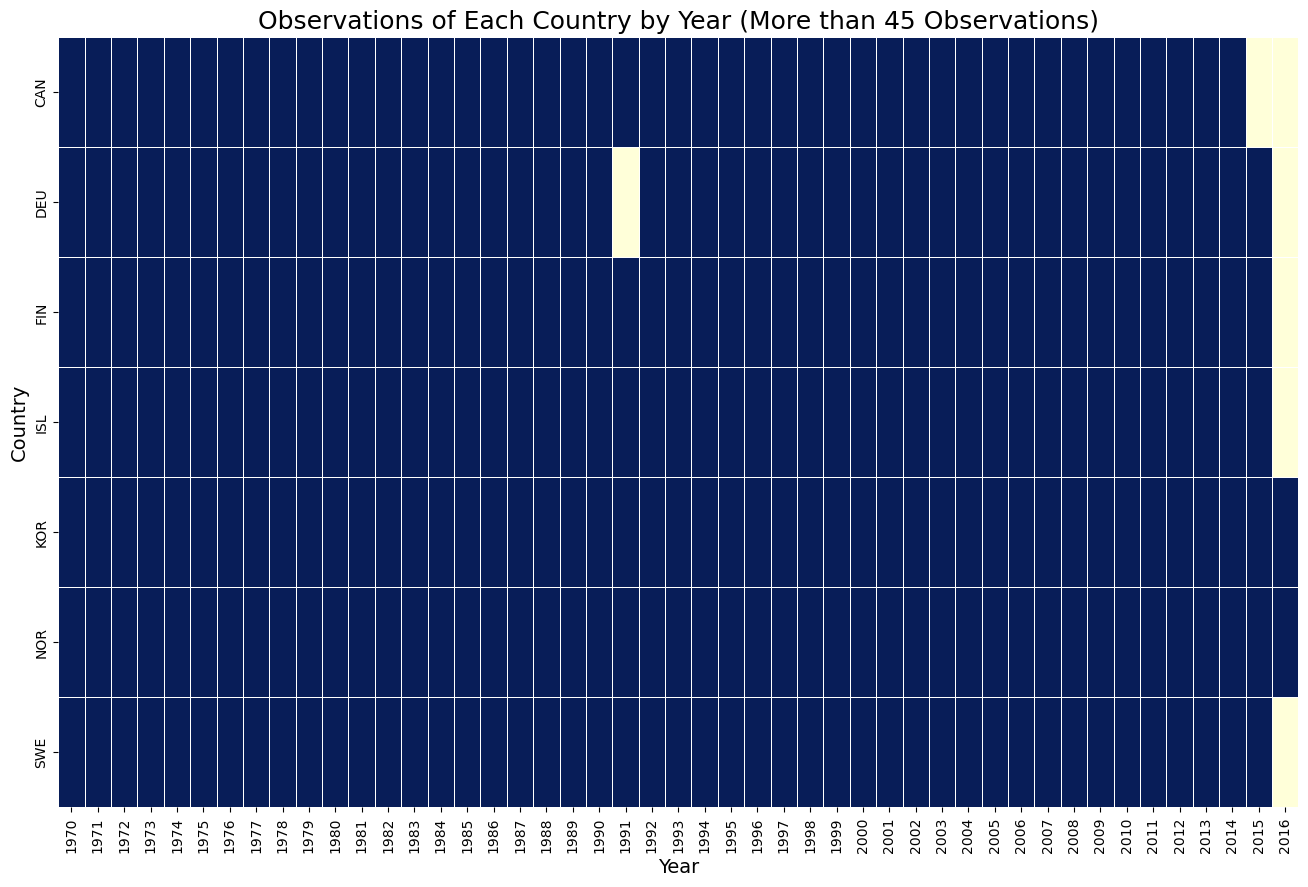

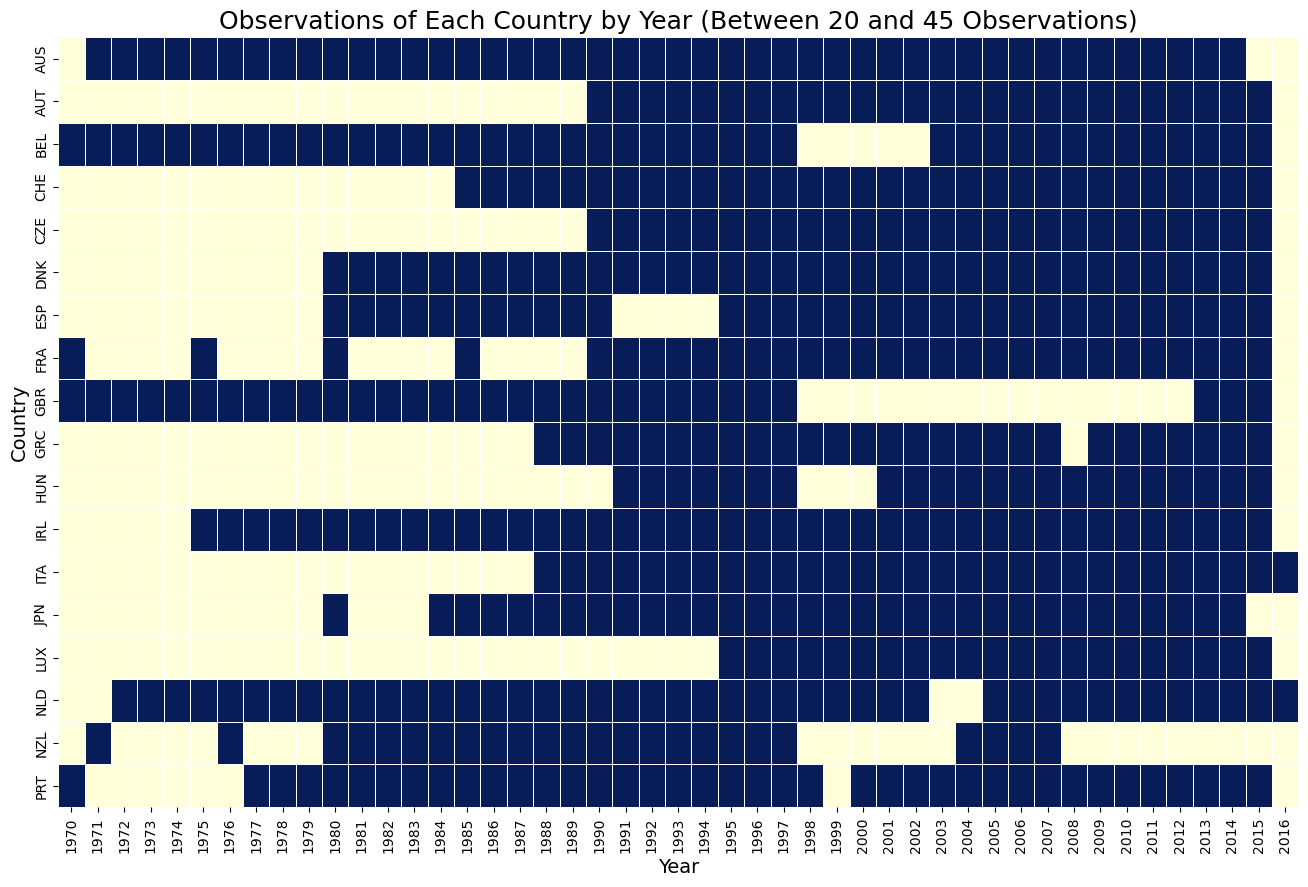

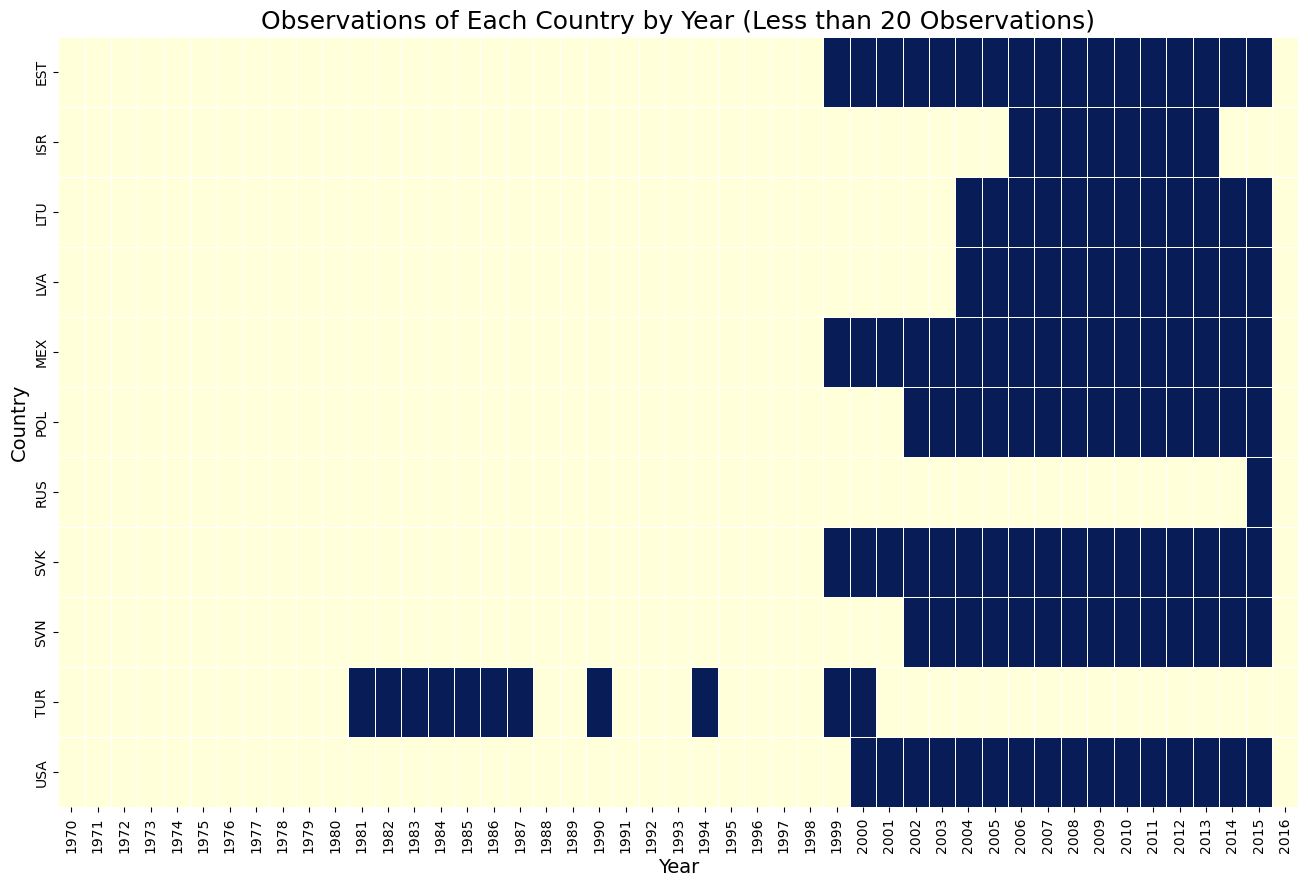

In [32]:
# Create heatmaps for each category
categories = ["More than 45 Observations", "Between 20 and 45 Observations", "Less than 20 Observations"]

for category in categories:
    # Filter countries belonging to the current category
    category_countries = country_observations[country_observations['Category'] == category]['LOCATION']
    pivot_table_category = pivot_table.loc[category_countries]

    # Plot the heatmap for the current category
    plt.figure(figsize=(16, 10))
    heatmap = sns.heatmap(
        pivot_table_category, 
        cmap="YlGnBu", 
        cbar=False, 
        linewidths=.5
    )
    heatmap.set_xlabel('Year', fontsize=14)
    heatmap.set_ylabel('Country', fontsize=14)
    heatmap.set_title(f'Observations of Each Country by Year ({category})', fontsize=18)
    
    # Display the heatmap
    plt.show()

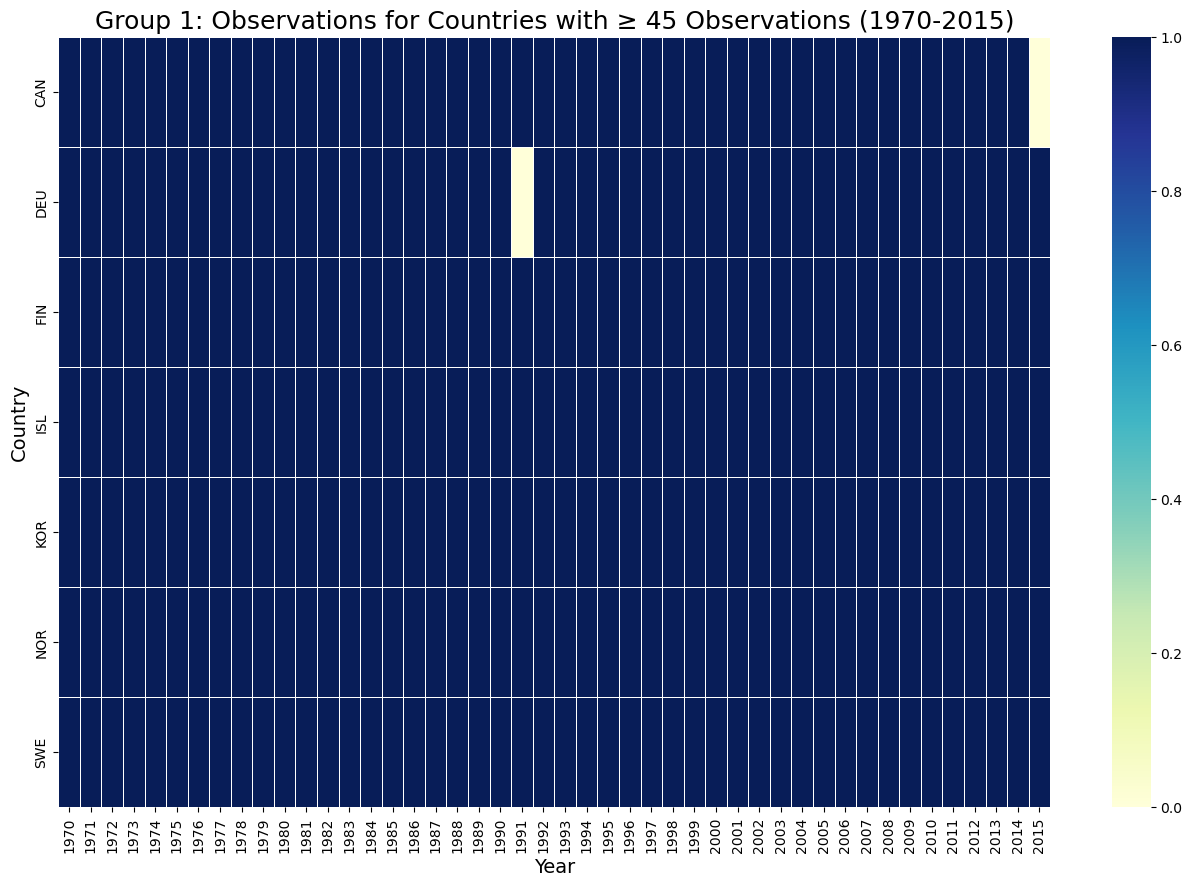

Number of countries in Group 1: 7
Countries in Group 1:
['CAN', 'DEU', 'FIN', 'ISL', 'KOR', 'NOR', 'SWE']


In [44]:
# Filter countries with 45 or more observations
countries_more_than_or_equal_45 = country_observations[country_observations['num_observations'] >= 45]['LOCATION']

# Subset the pivot table for these countries
pivot_table_group_1 = pivot_table.loc[countries_more_than_or_equal_45]

# Filter for the years 1970 to 2015
pivot_table_group_1_1970_2015 = pivot_table_group_1.loc[:, 1970:2015]

# Plot the heatmap for Group 1
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(
    pivot_table_group_1_1970_2015, 
    cmap="YlGnBu", 
    cbar=True, 
    linewidths=0.5
)

# Add labels and title
heatmap.set_xlabel('Year', fontsize=14)
heatmap.set_ylabel('Country', fontsize=14)
heatmap.set_title('Group 1: Observations for Countries with ≥ 45 Observations (1970-2015)', fontsize=18)

# Display the heatmap
plt.show()

# Print the number of countries in Group 1
num_countries_group_1 = len(countries_more_than_or_equal_45)
print(f"Number of countries in Group 1: {num_countries_group_1}")

# List the countries in Group 1
print("Countries in Group 1:")
print(countries_more_than_or_equal_45.tolist())


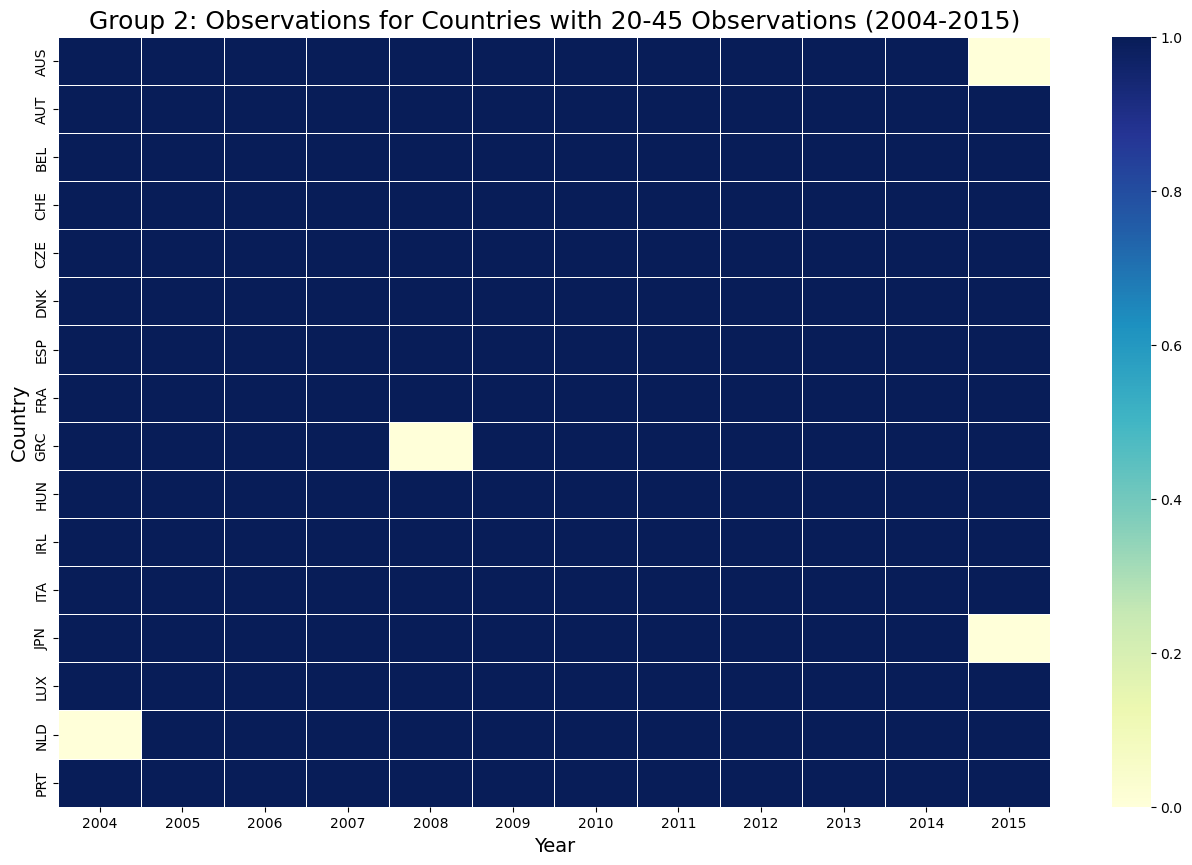

Number of countries in Group 2: 16
Countries in Group 2:
['AUS', 'AUT', 'BEL', 'CHE', 'CZE', 'DNK', 'ESP', 'FRA', 'GRC', 'HUN', 'IRL', 'ITA', 'JPN', 'LUX', 'NLD', 'PRT']


In [66]:
# Filter countries with observations between 20 and 45
countries_between_20_and_45 = country_observations[
    (country_observations['num_observations'] >= 20) & 
    (country_observations['num_observations'] < 45)
]['LOCATION']

# Exclude NZL and GBR
countries_group_2 = countries_between_20_and_45[
    ~countries_between_20_and_45.isin(['NZL', 'GBR'])
]

# Subset the pivot table for these countries
pivot_table_group_2 = pivot_table.loc[countries_group_2]

# Filter for the years 2004 to 2015
pivot_table_group_2_2004_2015 = pivot_table_group_2.loc[:, 2004:2015]

# Plot the heatmap for Group 2
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(
    pivot_table_group_2_2004_2015, 
    cmap="YlGnBu", 
    cbar=True, 
    linewidths=0.5
)

# Add labels and title
heatmap.set_xlabel('Year', fontsize=14)
heatmap.set_ylabel('Country', fontsize=14)
heatmap.set_title('Group 2: Observations for Countries with 20-45 Observations (2004-2015)', fontsize=18)

# Display the heatmap
plt.show()

# Print the number of countries in Group 2
num_countries_group_2 = len(countries_group_2)
print(f"Number of countries in Group 2: {num_countries_group_2}")

# List the countries in Group 2
print("Countries in Group 2:")
print(countries_group_2.tolist())


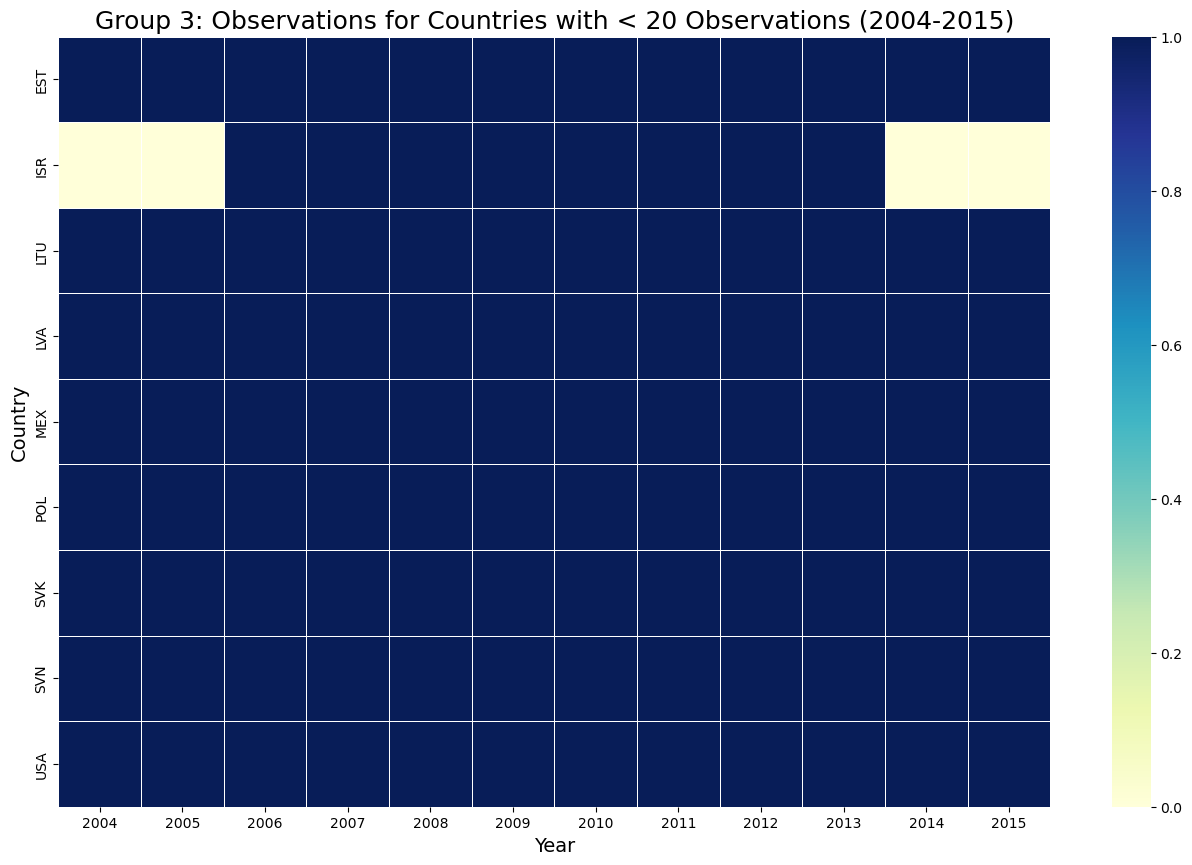

Number of countries in Group 3: 9
Countries in Group 3:
['EST', 'ISR', 'LTU', 'LVA', 'MEX', 'POL', 'SVK', 'SVN', 'USA']


In [42]:
# Filter countries with less than 20 observations
countries_less_than_20 = country_observations[country_observations['num_observations'] < 20]['LOCATION']

# Exclude RUS and TUR
countries_group_3 = countries_less_than_20[~countries_less_than_20.isin(['RUS', 'TUR'])]

# Subset the pivot table for these countries
pivot_table_group_3 = pivot_table.loc[countries_group_3]

# Filter for the years 2004 to 2015
pivot_table_group_3_2004_2015 = pivot_table_group_3.loc[:, 2004:2015]

# Plot the heatmap for Group 3
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(
    pivot_table_group_3_2004_2015, 
    cmap="YlGnBu", 
    cbar=True, 
    linewidths=0.5
)

# Add labels and title
heatmap.set_xlabel('Year', fontsize=14)
heatmap.set_ylabel('Country', fontsize=14)
heatmap.set_title('Group 3: Observations for Countries with < 20 Observations (2004-2015)', fontsize=18)

# Display the heatmap
plt.show()

# Print the number of countries in Group 3
num_countries_group_3 = len(countries_group_3)
print(f"Number of countries in Group 3: {num_countries_group_3}")

# List the countries in Group 3
print("Countries in Group 3:")
print(countries_group_3.tolist())


In [49]:
# Check if DEU in 1991 and CAN in 2015 exist in the dataset
df_deu_1991_exists = df[(df['LOCATION'] == 'DEU') & (df['TIME'] == 1991)]
df_can_2015_exists = df[(df['LOCATION'] == 'CAN') & (df['TIME'] == 2015)]

# If DEU in 1991 doesn't exist, perform interpolation on numeric columns only
if df_deu_1991_exists.empty:
    # Filter for DEU and years around 1991 (e.g., 1990 and 1992)
    df_deu_1991_interp = df[(df['LOCATION'] == 'DEU') & (df['TIME'].isin([1990, 1992]))]

    # Only interpolate numeric columns (excluding FLAG_CODES)
    numeric_columns = ['PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']
    df_deu_1991_interp.loc[:, numeric_columns] = df_deu_1991_interp.loc[:, numeric_columns].interpolate(method='linear', axis=0)

    print("Estimated Data for DEU in 1991 (after interpolation):")
    print(df_deu_1991_interp[['TIME', 'PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']])

else:
    print("Data already exists for DEU in 1991:")
    print(df_deu_1991_exists[['TIME', 'PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'FLAG_CODES', 'TOTAL_SPEND']])

# If CAN in 2015 doesn't exist, perform interpolation on numeric columns only
if df_can_2015_exists.empty:
    # Filter for CAN and years around 2015 (e.g., 2014 and 2016)
    df_can_2015_interp = df[(df['LOCATION'] == 'CAN') & (df['TIME'].isin([2014, 2016]))]

    # Only interpolate numeric columns (excluding FLAG_CODES)
    df_can_2015_interp.loc[:, numeric_columns] = df_can_2015_interp.loc[:, numeric_columns].interpolate(method='linear', axis=0)

    print("\nEstimated Data for CAN in 2015 (after interpolation):")
    print(df_can_2015_interp[['TIME', 'PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']])

else:
    print("\nData already exists for CAN in 2015:")
    print(df_can_2015_exists[['TIME', 'PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'FLAG_CODES', 'TOTAL_SPEND']])


Estimated Data for DEU in 1991 (after interpolation):
     TIME  PC_HEALTHXP  PC_GDP  USD_CAP  TOTAL_SPEND
314  1990       14.709   1.181  258.390     20524.70
315  1992       15.365   1.388  301.102     24276.23

Estimated Data for CAN in 2015 (after interpolation):
     TIME  PC_HEALTHXP  PC_GDP  USD_CAP  TOTAL_SPEND
155  2014       17.453   1.743  785.811     27931.31


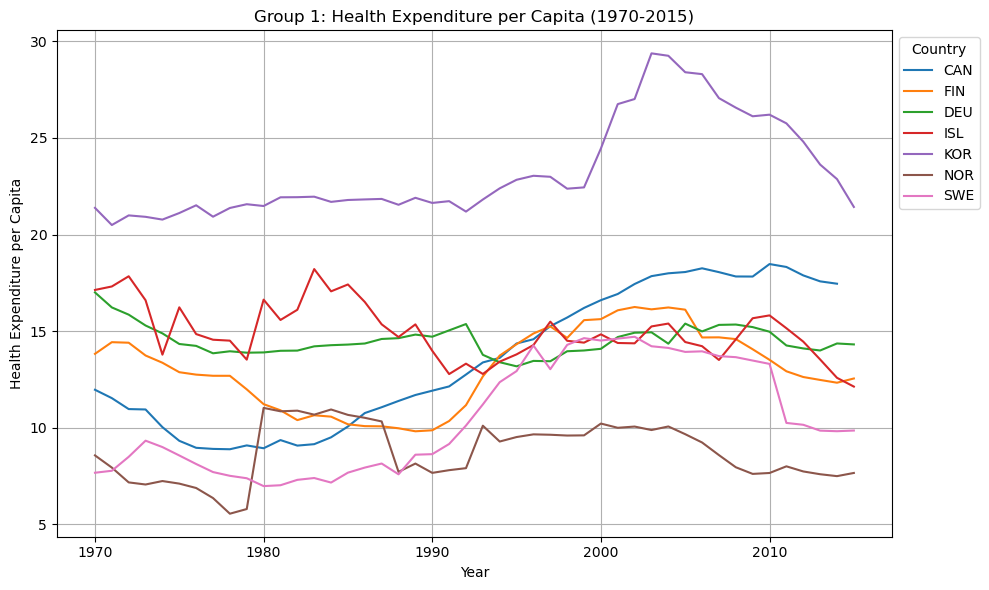

In [65]:
import matplotlib.pyplot as plt

# Filter countries with 45 or more observations
group_1_countries = df.groupby('LOCATION').filter(lambda x: len(x) >= 45)

# Filter Group 1 data for years 1970 to 2015
group_1_data = group_1_countries[(group_1_countries['TIME'] >= 1970) & (group_1_countries['TIME'] <= 2015)]

# Plot data for Group 1 countries
plt.figure(figsize=(10, 6))
for country in group_1_data['LOCATION'].unique():
    country_data = group_1_data[group_1_data['LOCATION'] == country]
    plt.plot(country_data['TIME'], country_data['PC_HEALTHXP'], label=country)

plt.title('Group 1: Health Expenditure per Capita (1970-2015)')
plt.xlabel('Year')
plt.ylabel('Health Expenditure per Capita')
plt.legend(title="Country", loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


In [76]:
import pandas as pd

# Define the function to interpolate missing data
def interpolate_missing_data(df, location, time_col='TIME', numeric_columns=['PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']):
    # Filter the data for the specific location (country)
    df_location = df[df['LOCATION'] == location]

    # Interpolate missing data for the specified numeric columns using linear interpolation
    df_location[numeric_columns] = df_location[numeric_columns].interpolate(method='linear', axis=0)

    return df_location

# List of countries and years to check and interpolate
countries_years = [
    ('AUS', 2015, [2014, 2016]),
    ('GRC', 2008, [2007, 2009]),
    ('NLD', 2004, [2003, 2005]),
    ('JPN', 2015, [2014, 2016])
]

# Interpolate for each country and year pair
for country, year, nearby_years in countries_years:
    df_exists = df[(df['LOCATION'] == country) & (df['TIME'] == year)]
    
    if df_exists.empty:
        # If data does not exist for the given year, interpolate using the nearby years
        df_interp = df[(df['LOCATION'] == country) & (df['TIME'].isin(nearby_years))]
        numeric_columns = ['PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']
        
        # Perform interpolation
        df_interp.loc[:, numeric_columns] = df_interp.loc[:, numeric_columns].interpolate(method='linear', axis=0)
        
        print(f"Estimated Data for {country} in {year} (after interpolation):")
        print(df_interp[['TIME', 'PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']])
    else:
        print(f"\nData already exists for {country} in {year}:")
        print(df_exists[['TIME', 'PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'FLAG_CODES', 'TOTAL_SPEND']])


Estimated Data for AUS in 2015 (after interpolation):
    TIME  PC_HEALTHXP  PC_GDP  USD_CAP  TOTAL_SPEND
43  2014       14.386   1.306  616.997     14475.18
Estimated Data for GRC in 2008 (after interpolation):
     TIME  PC_HEALTHXP  PC_GDP  USD_CAP  TOTAL_SPEND
358  2007       25.798   2.337  684.401      7561.59
359  2009       27.171   2.573  782.011      8685.81
Estimated Data for NLD in 2004 (after interpolation):
     TIME  PC_HEALTHXP  PC_GDP  USD_CAP  TOTAL_SPEND
652  2005       11.139   1.033  384.808      6280.02
Estimated Data for JPN in 2015 (after interpolation):
     TIME  PC_HEALTHXP  PC_GDP  USD_CAP  TOTAL_SPEND
535  2014       18.803   2.037  802.733    102168.65


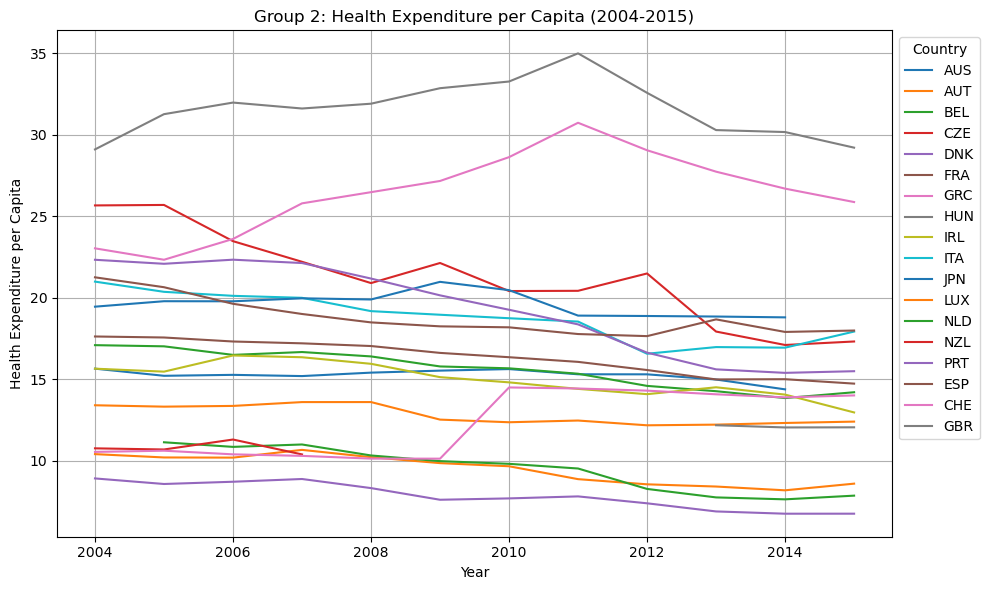

In [78]:
import matplotlib.pyplot as plt

# Filter countries with between 20 and 45 observations (excluding 45)
group_2_countries = df.groupby('LOCATION').filter(lambda x: 20 <= len(x) < 45)

# Filter Group 2 data for years 2004 to 2015
group_2_data = group_2_countries[(group_2_countries['TIME'] >= 2004) & (group_2_countries['TIME'] <= 2015)]

# Plot data for Group 2 countries
plt.figure(figsize=(10, 6))
for country in group_2_data['LOCATION'].unique():
    country_data = group_2_data[group_2_data['LOCATION'] == country]
    plt.plot(country_data['TIME'], country_data['PC_HEALTHXP'], label=country)

plt.title('Group 2: Health Expenditure per Capita (2004-2015)')
plt.xlabel('Year')
plt.ylabel('Health Expenditure per Capita')
plt.legend(title="Country", loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


In [80]:
import pandas as pd

# Filter countries with less than 20 observations (Group 3)
group_3_countries = df.groupby('LOCATION').filter(lambda x: len(x) < 20)

# Check if ISR has missing data for 2004, 2005, 2014, and 2015
isr_missing_years = [2004, 2005, 2014, 2015]
df_isr = df[df['LOCATION'] == 'ISR']

# Filter ISR data for years around the missing ones
df_isr_interp = df_isr[df_isr['TIME'].isin([2003, 2006, 2013, 2016])]

# Interpolate the missing values
numeric_columns = ['PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']
df_isr_interp.loc[:, numeric_columns] = df_isr_interp.loc[:, numeric_columns].interpolate(method='linear', axis=0)

# Display the estimated data for ISR
print("Estimated Data for ISR (2004, 2005, 2014, 2015):")
print(df_isr_interp[['TIME', 'PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']])

# Combine the estimated data back into the main dataframe
df_updated = pd.concat([df, df_isr_interp])


Estimated Data for ISR (2004, 2005, 2014, 2015):
      TIME  PC_HEALTHXP  PC_GDP  USD_CAP  TOTAL_SPEND
1003  2006       13.293   0.923  236.833      1670.55
1010  2013       12.924   0.915  313.203      2524.26


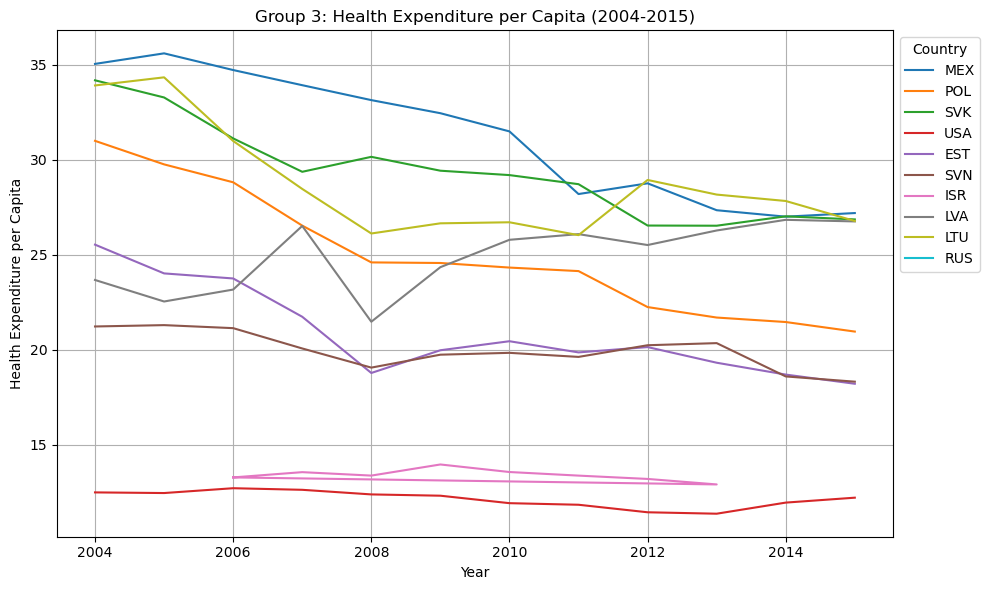

In [84]:
import matplotlib.pyplot as plt

# Filter countries with less than 20 observations (Group 3)
group_3_countries = df.groupby('LOCATION').filter(lambda x: len(x) < 20)

# Filter Group 3 data for years 2004 to 2015
group_3_data = group_3_countries[(group_3_countries['TIME'] >= 2004) & (group_3_countries['TIME'] <= 2015)]

# Include estimated data for ISR
# Assuming df_isr_interp contains the estimated data for ISR (as done earlier)
df_updated = pd.concat([df, df_isr_interp])

# Filter data for 2004 to 2015 including ISR
group_3_data = df_updated[(df_updated['TIME'] >= 2004) & (df_updated['TIME'] <= 2015)]
group_3_data = group_3_data[group_3_data['LOCATION'].isin(group_3_countries['LOCATION'].unique())]

# Plot data for Group 3 countries
plt.figure(figsize=(10, 6))
for country in group_3_data['LOCATION'].unique():
    country_data = group_3_data[group_3_data['LOCATION'] == country]
    plt.plot(country_data['TIME'], country_data['PC_HEALTHXP'], label=country)

plt.title('Group 3: Health Expenditure per Capita (2004-2015)')
plt.xlabel('Year')
plt.ylabel('Health Expenditure per Capita')
plt.legend(title="Country", loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()
